Importing the Libraries

In [11]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


Making an instance of Data class and loading the Data

In [12]:
fashion_mnist= keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()

In [13]:
print(x_train_full.shape)
print(y_train_full.shape)
print(x_test.shape)
print(y_test.shape)
print(type(x_train_full))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>


Displaying image from the Data

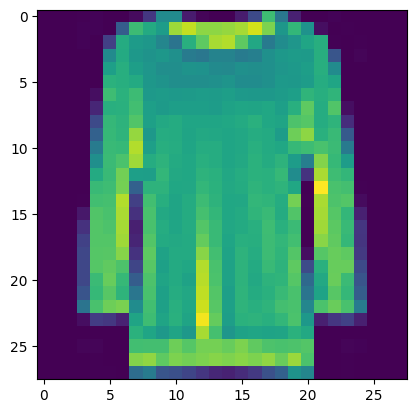

In [14]:
x_train_full[1,:,:]
import matplotlib.pyplot as plt
plt.imshow(x_train_full[199,:,:])

Splitting data into validation and training data

In [15]:
x_valid, x_train = x_train_full[:5000]/255.0 , x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000]/255.0 , y_train_full[5000:]/255.0

In [35]:
y_valid.shape
# y_train.shape

(5000,)

Giving the names to the classes 0 to 9

In [16]:
class_names = ['top', 'trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle_boot'
               ]
class_names[y_train_full[6]]

'sneaker'

Creating the model and weights Initialization

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [18]:
model.summary()
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
# weights.shape
# biases.shape
# print(weights)
# print(biases)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])

Training the Model

In [37]:
history = model.fit (x_train, y_train ,batch_size=16, epochs = 30 , validation_data= (x_valid, y_valid))

Epoch 1/30
3438/3438 [==============================] - 22s 6ms/step - loss: 4.3146e-06 - accuracy: 0.1008 - val_loss: 5.1526e-06 - val_accuracy: 0.0914
Epoch 2/30
3438/3438 [==============================] - 20s 6ms/step - loss: 4.2598e-06 - accuracy: 0.1008 - val_loss: 5.0882e-06 - val_accuracy: 0.0914
Epoch 3/30
3438/3438 [==============================] - 22s 6ms/step - loss: 4.2060e-06 - accuracy: 0.1008 - val_loss: 5.0263e-06 - val_accuracy: 0.0914
Epoch 4/30
3438/3438 [==============================] - 21s 6ms/step - loss: 4.1538e-06 - accuracy: 0.1008 - val_loss: 4.9652e-06 - val_accuracy: 0.0914
Epoch 5/30
3438/3438 [==============================] - 22s 6ms/step - loss: 4.1027e-06 - accuracy: 0.1008 - val_loss: 4.9057e-06 - val_accuracy: 0.0914
Epoch 6/30
3438/3438 [==============================] - 19s 6ms/step - loss: 4.0529e-06 - accuracy: 0.1008 - val_loss: 4.8474e-06 - val_accuracy: 0.0914
Epoch 7/30
3438/3438 [==============================] - 19s 5ms/step - loss: 4.004

In [39]:
print(history.params)
print(history.epoch)
print(history.history)

{'verbose': 1, 'epochs': 30, 'steps': 3438}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
{'loss': [4.314611942390911e-06, 4.2597739593475126e-06, 4.206011908536311e-06, 4.1537696233717725e-06, 4.102702860109275e-06, 4.052890290040523e-06, 4.0041109059529845e-06, 3.956642103730701e-06, 3.910146915586665e-06, 3.864650352625176e-06, 3.820304755208781e-06, 3.777185838771402e-06, 3.7345701002777787e-06, 3.692929794851807e-06, 3.6523915696307085e-06, 3.612613454606617e-06, 3.5738337373913964e-06, 3.535771611495875e-06, 3.4983027035195846e-06, 3.4617310120665934e-06, 3.426002649575821e-06, 3.3909147987287724e-06, 3.3563110264367424e-06, 3.322742713862681e-06, 3.289591404609382e-06, 3.2571285828453256e-06, 3.2253451536234934e-06, 3.1939723612595117e-06, 3.1634233437216608e-06, 3.1333620427176356e-06], 'accuracy': [0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.100781820

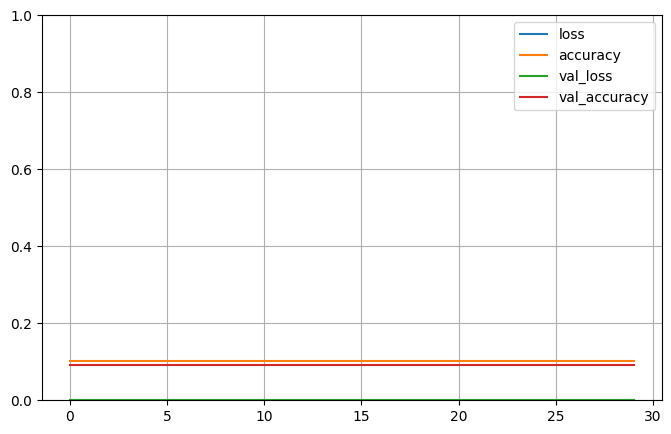

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [41]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 9530.3672 - accuracy: 0.1000


[9530.3671875, 0.10000000149011612]

In [52]:
x_new = x_test[5575:5780]
y_proba = model.predict(x_new)


7/7 [==============================] - 0s 4ms/step


In [54]:
import numpy as np
predict_x=model.predict(x_new) 
classes_x=np.argmax(predict_x,axis=1)

7/7 [==============================] - 0s 4ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [55]:
y_new = y_test[5575:5780]
y_new

array([3, 3, 0, 2, 1, 7, 0, 5, 4, 5, 3, 6, 2, 1, 6, 0, 7, 3, 6, 6, 3, 6,
       1, 5, 2, 9, 0, 8, 0, 4, 4, 0, 1, 7, 5, 3, 3, 3, 2, 0, 3, 5, 2, 6,
       2, 5, 1, 4, 6, 2, 1, 9, 3, 4, 6, 9, 5, 8, 0, 6, 3, 6, 0, 8, 1, 2,
       3, 3, 1, 5, 5, 3, 2, 6, 7, 1, 3, 2, 3, 6, 1, 2, 2, 8, 0, 8, 4, 7,
       0, 3, 1, 3, 8, 3, 4, 1, 2, 0, 3, 6, 7, 7, 8, 3, 6, 9, 5, 6, 6, 9,
       5, 4, 3, 8, 5, 3, 8, 3, 7, 9, 6, 2, 5, 1, 0, 5, 2, 3, 5, 7, 9, 6,
       0, 7, 1, 2, 0, 8, 2, 2, 2, 7, 8, 0, 2, 4, 4, 9, 7, 3, 2, 5, 4, 5,
       1, 9, 5, 0, 5, 2, 4, 1, 7, 9, 0, 3, 3, 4, 9, 1, 0, 1, 9, 5, 6, 8,
       2, 2, 1, 4, 0, 6, 7, 9, 0, 1, 1, 4, 3, 6, 9, 8, 1, 3, 7, 3, 9, 9,
       5, 4, 2, 3, 6, 8, 8], dtype=uint8)